# 3D Wannier

In [1]:
# Directives on Jupyter
%reset
# Auto reload bootstrap.py
%load_ext autoreload
%autoreload 2

import numpy as np

In [1]:
from wannier import *
import numpy as np
from positify import positify

N = 20
V0 = 100
ax = 820
ay = 1000
R0 = np.array([3, 3, 7.2])
dvr = Wannier(
    N,
    R0,
    # lattice=np.array([2, 2], dtype=int),
    lattice=np.array([2], dtype=int),
    lc=(ax, ay),
    trap=(2 * V0, 707, 2.17E3),
    atom=87,
    laser=707,
    ascatt=95,
    avg=1 / 2,
    sparse=True,
    symmetry=True)

E, W, parity = eigen_basis(dvr)

A, U = optimization(dvr, E, W, parity)
mu = np.diag(A)  # Diagonals are mu_i
t = -(A - np.diag(mu))  # Off-diagonals are t_ij
print('mu_i = ', np.real(mu))
print('t_ij =', abs(t))
V = interaction(dvr, U, W, parity)
print('U_i =', abs(V))

DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=200kHz w=707m
lattice: Full lattice sizes: [2 1 1]
lattice: lattice constants: [1.15983027 1.41442716 1.15983027]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[23 20 20] is set.
DVR: R0=[3.57991513 3.         7.2       ]w is set.
H_op: n=[23 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian sparse diagonalization is enabled. Lowest 2 states are to be calculated.
H_op: n=[23 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian operator constructed.
H_solver: diagonalize sparse hermitian matrix.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.21s.
H_solver: eigenstates memory usage: 0.16 MiB.
H_op: n=[23 20 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian sparse diagonalization is enabled. Lowest 2 states are to be calculated.
H_op: n=[23 20 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian operator constructed.
H_solver: diagonalize spars

DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[20 20 20] is set.
DVR: R0=[3.  3.  7.2]w is set.
['x' 'y' 'z']-reflection symmetry is used.
param_set: trap parameter V0=110kHz w=707m
lattice: Full lattice sizes: [2 1 1]
lattice: lattice constants: [1.15983027 1.41442716 1.15983027]w
DVR: dx=[0.15 0.15 0.36]w is set.
DVR: n=[23 20 20] is set.
DVR: R0=[3.57991513 3.         7.2       ]w is set.
H_op: n=[23 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian sparse diagonalization is enabled. Lowest 2 states are to be calculated.
H_op: n=[23 20 20] dx=[0.15 0.15 0.36]w p=[1 1 1] Gaussian operator constructed.
H_solver: diagonalize sparse hermitian matrix.
H_solver: Gaussian Hamiltonian solved. Time spent: 0.22s.
H_solver: eigenstates memory usage: 0.16 MiB.
H_op: n=[23 20 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian sparse diagonalization is enabled. Lowest 2 states are to be calculated.
H_op: n=[23 20 20] dx=[0.15 0.15 0.36]w p=[-1  1  1] Gaussian operator constructed.
H_solver: diagonalize spars

Text(0, 0.5, 'E (Hz)')

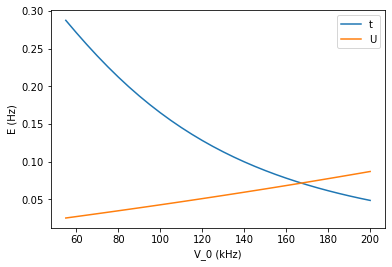

In [13]:
from wannier import *
import numpy as np
from positify import positify
import matplotlib.pyplot as plt

N = 20
ax = 820
ay = 1000
R0 = np.array([3, 3, 7.2])
V_list = np.arange(55, 205, 5)

t_list = np.array([])
U_list = np.array([])
for V0 in V_list:
    dvr = Wannier(N,
                  R0,
                  lattice=np.array([2], dtype=int),
                  lc=(ax, ay),
                  trap=(2 * V0, 707, 2.17E3),
                  atom=87,
                  laser=707,
                  ascatt=95,
                  avg=1 / 2,
                  sparse=True,
                  symmetry=True)

    E, W, parity = eigen_basis(dvr)

    A, U = optimization(dvr, E, W, parity)
    mu = np.diag(A)  # Diagonals are mu_i
    t = -(A - np.diag(mu))  # Off-diagonals are t_ij
    print('mu_i = ', np.real(mu))
    print('t_ij =', abs(t))
    t_list = np.append(t_list, abs(t[0, 1]))
    V = interaction(dvr, U, W, parity)
    print('U_i =', abs(V))
    U_list = np.append(U_list, abs(V[0]))

plt.plot(V_list, t_list, label='t')
plt.plot(V_list, U_list, label='U')
plt.legend()
plt.xlabel('V_0 (kHz)')
plt.ylabel('E (Hz)')

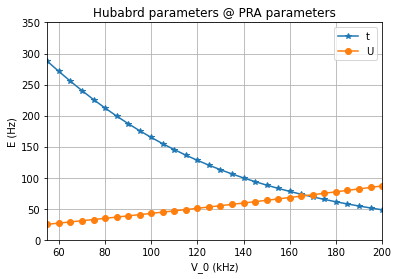

In [15]:
plt.plot(V_list, t_list * 1E3, '*-', label='t')
plt.plot(V_list, U_list * 1E3, 'o-', label='U')
plt.legend()
plt.title('Hubabrd parameters @ PRA parameters')
plt.xlabel('V_0 (kHz)')
plt.ylabel('E (Hz)')
plt.ylim([0, 350])
plt.xlim([55, 200])
plt.grid()
plt.savefig('Hubbard.png')

| 1D | Chain |
| -- | ----- |
| 2 | 0.33406693 |
| 3 | 0.29108221 0.29108221 |
| 4 | 0.29064946 0.24734239 0.29064945 |
| 5 | 2.90641293e-01 2.46824744e-01 2.46824745e-01 2.90641295e-01 |

| 2D | Plaquett |
| -- | -------- |
| 2x2 | 0.33312028 0.09639722 |
| 3x3 | 2.90170850e-01 2.89149888e-01 9.02413012e-02 8.77313483e-02 |

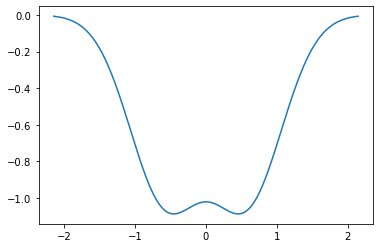

In [2]:
import matplotlib.pyplot as plt

x = np.linspace(-dvr.R0[0] * 0.6, dvr.R0[0] * 0.6, 500)
V = dvr.Vfun(x, 0, 0)

plt.plot(x, V)

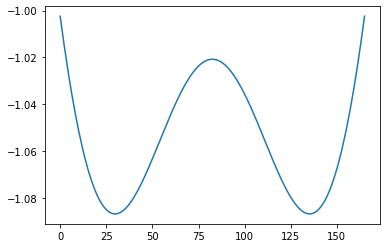

In [3]:
plt.plot(V[V < -1])

The trap depth difference between edges and bulks are $\sim 1\%$.

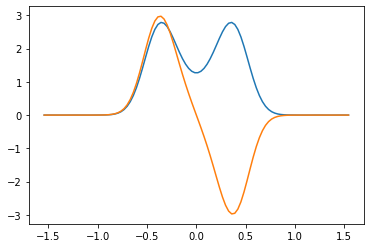

In [5]:
import matplotlib.pyplot as plt

x = np.linspace(-dvr.R0[0] / 2, dvr.R0[0] / 2, 100)
V = np.array([]).reshape(len(x), 0)
for i in range(parity.shape[0]):
    V = np.append(V,
                  psi(dvr.n[0], dvr.dx[0], W[i], x, parity[i,
                                                           0]).reshape(-1, 1),
                  axis=1)
plt.plot(x * dvr.w * a0 * 1E9 / ax, positify(V))

/Users/nottforestfc/mambaforge/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/nottforestfc/mambaforge/lib/python3.9/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


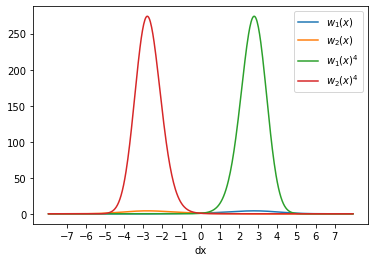

In [36]:
import matplotlib.pyplot as plt

x = np.linspace(-dvr.R0[0] / 3, dvr.R0[0] / 3, 500)
# plt.plot(x * dvr.w * a0 * 1E9 / ax,
c = int(x[0] / dvr.dx[0])
plt.xticks(np.arange(c, -c + 1, 1.0))
plt.plot(x / dvr.dx[0],
         positify(wannier_func(x, dvr, W, U, parity)),
         label=('$w_1(x)$', '$w_2(x)$'))
plt.plot(x / dvr.dx[0],
         positify(wannier_func(x, dvr, W, U, parity))**4,
         label=('$w_1(x)^4$', '$w_2(x)^4$'))
plt.xlabel('dx')
# plt.ylim([1E-2,3000])
# plt.yscale('log')
plt.legend()

In [11]:
from wannier import *
import numpy as np
from positify import positify

N = 20
R0 = np.array([3, 3, 3])
dvr = Wannier(N,
              R0,
              lattice=np.array([2], dtype=int),
              lc=(10, 1),
              model='sho',
              dim=1,
              avg=1,
              sparse=True,
              symmetry=True)

E, W, parity = eigen_basis(dvr)

A, U = optimization(dvr, E, W, parity)
mu = np.diag(A)  # Diagonals are mu_i
t = -(A - np.diag(mu))  # Off-diagonals are t_ij
print('mu_i = ', np.real(mu))
print('t_ij =', abs(t))
V = interaction(dvr, U, W, parity)
print('U_i =', abs(V))

DVR: dx=[0.15]w is set.
DVR: n=[20] is set.
DVR: R0=[3]w is set.
['x']-reflection symmetry is used.
param_set: trap parameter V0=1.0 w=1.0
lattice: Full lattice sizes: [2 1 1]
lattice: lattice constants: [10  1 10]w
DVR: dx=[0.5]w is set.
DVR: n=[30] is set.
DVR: R0=[15.]w is set.
H_op: n=[30] dx=[0.5]w p=[1] sho sparse diagonalization is enabled. Lowest 2 states are to be calculated.
H_op: n=[30] dx=[0.5]w p=[1] sho operator constructed.
H_solver: diagonalize sparse hermitian matrix.
H_solver: sho Hamiltonian solved. Time spent: 0.00s.
H_solver: eigenstates memory usage: 0.00 MiB.
H_op: n=[30] dx=[0.5]w p=[-1] sho sparse diagonalization is enabled. Lowest 2 states are to be calculated.
H_op: n=[30] dx=[0.5]w p=[-1] sho operator constructed.
H_solver: diagonalize sparse hermitian matrix.
H_solver: sho Hamiltonian solved. Time spent: 0.00s.
H_solver: eigenstates memory usage: 0.00 MiB.
Optimizing...
Iteration    Cost                       Gradient norm     
---------    ----------------

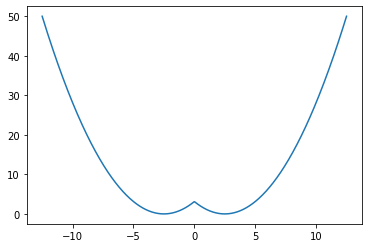

In [10]:
import matplotlib.pyplot as plt

x = np.linspace(-dvr.R0[0], dvr.R0[0], 500)
V = dvr.Vfun(x, 0, 0)

plt.plot(x, V)